In [3]:
import csv
import pandas as pd
import numpy as np

In [4]:
movies=pd.read_csv("./ml-dataset/movies.csv")

In [5]:
movies.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [6]:
links=pd.read_csv("ml-dataset/links.csv")
links.head(10)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
5,6,113277,949.0
6,7,114319,11860.0
7,8,112302,45325.0
8,9,114576,9091.0
9,10,113189,710.0


In [7]:
ratings=pd.read_csv("ml-dataset/ratings.csv")
ratings.head(10)

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580
5,1,112,3.5,1094785740
6,1,151,4.0,1094785734
7,1,223,4.0,1112485573
8,1,253,4.0,1112484940
9,1,260,4.0,1112484826


In [8]:
# # Switching to matrix calculation for speed; drop records without ratings
# final = pd.merge(movies, ratings, on='movieId', how='left')

In [9]:
import re

In [10]:
movies['release_year'] = movies['title'].str.strip().str.extract(r'^.*(\d{4})(.*)$')[0]

C:\Users\Yonge\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


In [11]:
movies['release_year'] = movies[movies['release_year'].notnull()]['release_year'].astype(int)

In [12]:
movies['release_year'][0]

1995.0

# Filtering

In [13]:
# years=[]
# import numpy as np
# for i in range(len(movies)):
#     title=movies.iloc[i]["title"]
#     if "(" in title:
#         try:
#             year=int(movies.iloc[i]["title"].rsplit("(",1)[1].split(")")[0])
#         except ValueError:
#             year=np.nan
#     years.append(year)

In [14]:
movies_new = movies[movies.release_year > 2008]

In [15]:
#movies[movies.release_year > 2008].to_csv('./ml-dataset/movies10.csv')

In [16]:
movies_new.release_year.value_counts()

2009.0    1114
2012.0    1022
2011.0    1016
2013.0    1011
2010.0     962
2014.0     740
2015.0     120
Name: release_year, dtype: int64

In [17]:
# years_sr=pd.Series(years)

In [18]:
# movies["release_year"]=years_sr.values
movies.head(5)

,movieId,title,genres,release_year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995.0
2,3,Grumpier Old Men (1995),Comedy|Romance,1995.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0
4,5,Father of the Bride Part II (1995),Comedy,1995.0


In [19]:
genres=movies["genres"]

In [20]:
genre=list(genres)

In [21]:
genres_list=[]
for g in genre:
    items=g.split("|")
    for item in items:
        if item in genres_list:
            pass
        else:
            genres_list.append(item)
print(genres_list)

['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Mystery', 'Sci-Fi', 'IMAX', 'Documentary', 'War', 'Musical', 'Western', 'Film-Noir', '(no genres listed)']


In [22]:
for genre in genres_list:
    movies[genre]=0

NameError: name 'plt' is not defined

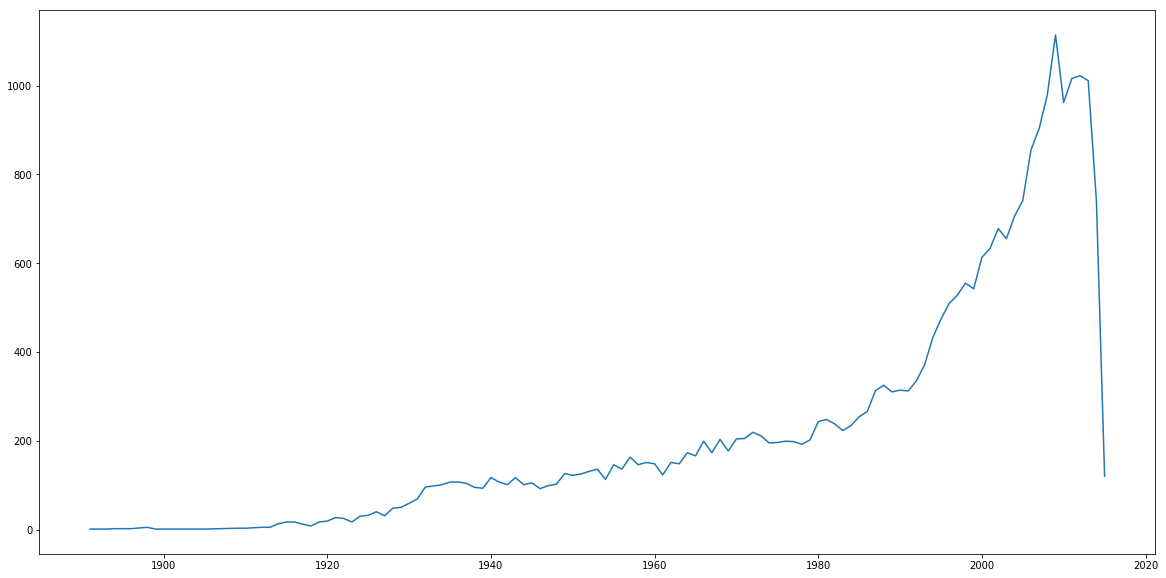

In [24]:
movies.release_year.value_counts().sort_index().plot(figsize=(20,10))
plt.title('Number of movies over time')

In [25]:
movies.head()

,movieId,title,genres,release_year,Adventure,Animation,Children,Comedy,Fantasy,Romance,...,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,1995.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,1995.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Link to tmdb

In [26]:
last_10yr_id = pd.Series(movies_new.movieId.unique())

In [30]:
last_10yr_id.to_csv('mID.csv', index=False)

In [135]:
import tmdbsimple as tmdb
tmdb.API_KEY = 'b93b517fa262fe2fdf374829ee9e2fb5'

In [136]:
movie = tmdb.Movies(603)

In [144]:
movie.

ValueError: arrays must all be same length

In [ ]:
for i in la

In [113]:
movies.head(5)

,movieId,title,genres,release_year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995.0
2,3,Grumpier Old Men (1995),Comedy|Romance,1995.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0
4,5,Father of the Bride Part II (1995),Comedy,1995.0


In [67]:
def genre(x):
    for g in movies.columns[4:]:
        if g in x['genres']:
            x[g] = 1
    return x

In [68]:
movies = movies.apply(func = genre, axis = 1)

In [69]:
movies.head()

,movieId,title,genres,release_year,Adventure,Animation,Children,Comedy,Fantasy,Romance,...,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,1995.0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,1995.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
movies[movies.release_year > 2008]

,movieId,title,genres,release_year,Adventure,Animation,Children,Comedy,Fantasy,Romance,...,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
12856,60684,Watchmen (2009),Action|Drama|Mystery|Sci-Fi|Thriller|IMAX,2009.0,0,0,0,0,0,0,...,0,1,1,1,0,0,0,0,0,0
13033,62265,"Accidental Husband, The (2009)",Comedy|Romance,2009.0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
13101,63072,"Road, The (2009)",Adventure|Drama|Thriller,2009.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13338,65585,Bride Wars (2009),Comedy|Romance,2009.0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
13341,65601,My Bloody Valentine 3-D (2009),Horror|Thriller,2009.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
13358,65682,Underworld: Rise of the Lycans (2009),Action|Fantasy|Horror|Thriller,2009.0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
13375,65802,Paul Blart: Mall Cop (2009),Action|Comedy|Crime,2009.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
13376,65810,Notorious (2009),Drama|Musical,2009.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
13377,65813,"Unborn, The (2009)",Horror|Mystery|Thriller,2009.0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
13384,65882,"Uninvited, The (2009)",Drama|Horror|Mystery|Thriller,2009.0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0


In [70]:
# Change to apply for speed

# for i in range(len(movies)):
#     for nm in genres_list:
#         if nm in movies.iloc[i]["genres"]:
#             movies.loc[i,nm]=1
#         else:
#             pass
# movies.head(10)

In [71]:
import numpy as np

In [72]:
max_yr=int(movies["release_year"].max())
min_yr=int(movies["release_year"].min())
print(min_yr,max_yr)

1891 2015


In [73]:
# all_years=[]
# for i in range(min_yr,max_yr+1):
#     all_years.append(i)
# print(all_years)
movies['release_year'].unique()

array([1995., 1994., 1996., 1976., 1992., 1988., 1967., 1993., 1964.,
       1977., 1965., 1982., 1985., 1990., 1991., 1989., 1937., 1940.,
       1969., 1981., 1973., 1970., 1960., 1955., 1959., 1968., 1980.,
       1975., 1986., 1948., 1943., 1950., 1946., 1987., 1997., 1974.,
       1956., 1958., 1949., 1972., 1998., 1933., 1952., 1951., 1957.,
       1961., 1954., 1934., 1944., 1963., 1942., 1941., 1953., 1939.,
       1947., 1945., 1938., 1935., 1936., 1926., 1932., 1979., 1971.,
       1978., 1966., 1962., 1983., 1984., 1931., 1922., 1999., 1927.,
       1929., 1930., 1928., 1925., 1914., 2000., 1919., 1923., 1920.,
       1918., 1921., 2001., 1924., 2002., 2003., 1915., 2004., 1916.,
       1917., 2005., 2006., 1902.,   nan, 1903., 2007., 2008., 2009.,
       1912., 2010., 1913., 2011., 1898., 1899., 1894., 2012., 1909.,
       1910., 1901., 1893., 2013., 1896., 2014., 1895., 2015., 1900.,
       1905., 1891.])

In [74]:
movies.head()

,movieId,title,genres,release_year,Adventure,Animation,Children,Comedy,Fantasy,Romance,...,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,1995.0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,1995.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
movies[movies['movieId'] == 131146]

,movieId,title,genres,release_year,Adventure,Animation,Children,Comedy,Fantasy,Romance,...,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
27248,131146,Werner - Volles Rooäää (1999),Animation|Comedy,1999.0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
movies_melt = movies.melt(id_vars=['movieId', 'title', 'genres', 'release_year'], var_name='genre')

In [77]:
graph = movies_melt.pivot_table(index = ['release_year'], columns=['genre'], values=['value'], aggfunc = np.sum)

In [30]:
#movies_melt.groupby(['release_year', 'genre'])['value'].sum()

In [31]:
# allyears_sr=pd.Series(all_years)
# genre_year=allyears_sr.to_frame(name="Year")

In [32]:
# for genre in genres_list:
#     genre_year[genre]=0

In [33]:
# for y in range(len(genre_year)):
#     for m in range(len(movies)):
#         for col in range(4,24):
#             if movies.iloc[m,col]==1 and genre_year.iloc[y,0]==movies.iloc[m,3]:
#                 genre_year.iloc[y,col-3]=genre_year.iloc[y,col-3]+1

# genre_year.head(25)

In [34]:
# graph=pd.DataFrame(data=genre_year,index=genre_year.Year, columns=['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Mystery', 'Sci-Fi', 'IMAX', 'Documentary', 'War', 'Musical', 'Western', 'Film-Noir', '(no genres listed)'],copy=True)

In [35]:
# graph=genre_year[['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Mystery', 'Sci-Fi', 'IMAX', 'Documentary', 'War', 'Musical', 'Western', 'Film-Noir', '(no genres listed)']].copy()

In [36]:
# graph.index=genre_year['Year']
# graph

In [37]:
graph.columns = graph.columns.get_level_values(1)

In [38]:
graph.index.max()

2015.0

In [39]:
import matplotlib.pyplot as plt
import matplotlib.dates

In [40]:
min(graph.index)

1891.0

In [41]:
graph

genre,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,,,
1891.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1893.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1894.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1895.0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1896.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1898.0,3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1899.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1900.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1901.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


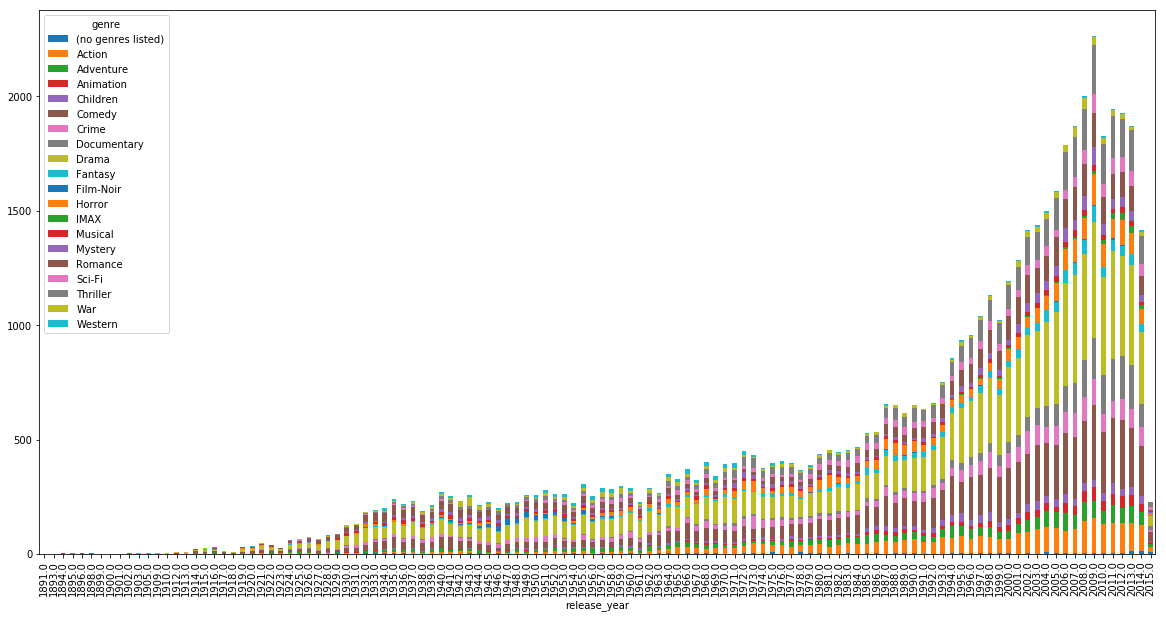

In [42]:

plt.figure()
graph.plot.bar(stacked=True,figsize=(20,10))


plt.show()

In [43]:
new_movies=movies.copy()

In [ ]:
new_movies['Adventure']=0
new_movies['Animation']=0 
new_movies['Children']=0
new_movies['Comedy']=0
new_movies['Fantasy']=0
new_movies['Romance']=0
new_movies['Drama']=0
new_movies['Action']=0
new_movies['Crime']=0
new_movies['Thriller']=0
new_movies['Horror']=0
new_movies['Mystery']=0
new_movies['Sci-Fi']=0
new_movies['IMAX']=0
new_movies['Documentary']=0
new_movies['War']=0
new_movies['Musical']=0
new_movies['Western']=0
new_movies['Film-Noir']=0
new_movies['(no genres listed)']=0

In [ ]:
new_movies.head(5)
for i in range(len(new_movies)):
    for j in range(len(ratings)):
        if new_movies.iloc[i]["movieId"]==ratings.iloc[j]["movieId"]:
            for col in range(4,24):
                if movies.iloc[i,col]>0:
                    new_movies.iloc[i,col]=new_movies.iloc[i,col]+ratings.iloc[j,2]
            break
            
new_movies.head(10)